# 문제 1

### (1) 로지스틱 회귀에 대해 선형회귀와 비교하여 설명하세요.
#### (1)-1 로지스틱 회귀를 사용하면 좋은 데이터의 종류?
### (2) 회귀 트리의 예측 과정을 설명하세요.

(1) 로지스틱 회귀는 선형회귀와 달리 sigmoid function을 이용하여 최적의 sigmoid function을 도출하는 회귀이다. 선형회귀는 종속변수의 범위가 정해지지 않은 반면, 로지스틱 회귀는 종속변수의 범위가 0~1로 정해진다. 따라서 이를 확률로 해석할 수 있고, classification의 문제에서 적용하기에 좋다.

(2) feature의 균일도를 반영하여 분할하고, 리프노드에 소속된 데이터 값의 평균값을 구해서 최종적으로 리프 노드에 결정 값으로 할당한다.

# 문제 2

### (1) Ridge (L2) Regression을 설명하세요. (참고 링크: https://youtu.be/Q81RR3yKn30)
### (2) Lasso (L1) Regression을 설명하세요. (참고 링크: https://youtu.be/NGf0voTMlcs)
### (3) Ridge (L2) Regression과 Lasso (L1) Regression의 차이점을 서술하세요.

1. Ridge Regression 은 L2 규제를 부여하는 방식으로, weight값의 제곱에 대해 패널티를 부여하는 방식이다.
2. Lasso Regression 은 L! 규제를 부여하는 방식으로, weight값의 절댓값에 대해 패널티를 부여하는 방식이다.
3. Lasso Regression은 영향력이 작은 weight의 값을 0으로 만드는 방향으로 움직이는 반면, Ridge Regression은 전체적으로 고른 weight 분포 값을 만드는 방향으로 움직인다.

# 문제 3 
## 다음 문제 과정에 필요한 코드를 완성하세요.


### (1) train.csv 파일 불러오기

### (2) 문자열을 datetime 타입으로 변경. 

### (3) datetime 타입에서 년, 월, 일, 시간 추출
*lambda를 이용해서 추출
ex) 파일[열이름]=파일.datetime.apply(lambda x: x.year)

### (4) 'datetime','casual','registered''temp''atemp' 5개의 열은 제외하기
*drop 함수 이용

### (5) RMSLE, RMSE, MAE 값 구하기 
답: RMSLE: 1.221, RMSE: 149.317, MAE: 111.420

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [22]:
#3-(1)
train = pd.read_csv("./train.csv")

In [23]:
#3-(2)
train.datetime = pd.to_datetime(train.datetime)


In [4]:
#3-(3)
train["year"]= train.datetime.apply(lambda x : x.year)
train["month"]  = train.datetime.apply(lambda x : x.month)
train["day"] = train.datetime.apply(lambda x : x.day)
train["hour"] = train.datetime.apply(lambda x : x.hour)

In [26]:
#3-(4)
drop_columns = ['datetime','casual','registered', 'temp', 'atemp']
train.drop(drop_columns, axis=1,inplace=True)

In [30]:
#3-(5)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    
    mae_val = mean_absolute_error(y,pred)
    print(f"RMSLE : {rmsle_val}, RMSE : {rmse_val}, MAE : {mae_val}")

X_features = train.drop(["count"], axis=1)
y_target = train["count"]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE : 1.2213726796860824, RMSE : 149.31653208184704, MAE : 111.42038771242213


# 문제 4

### (1) 3번의 결과, 예측오류가 크다고 볼 수 있습니다. 그 이유는? 

### (2) 예측오류를 줄이기위한 대표적인 방법으로 정규화가 있습니다. 아래 순서대로 코드를 완성하세요.
   
       -실제값과 예측값의 차이 확인하라. 오류값이 가장 큰 순으로 7개를 나열하세요.
       -결과 값이 정규분포로 되어있는지 그래프를 확인하세요.
       -정규분포가 아닐 경우, log1p()를 활용하여 정규화하세요.

(1) 대여횟수에 비해 예측오류가 크기 때문에 예측 오류가 크다고 볼수 있음

In [34]:
def get_top_error_data(y_test, pred, n_tops = 7):
    result_df = pd.DataFrame(y_test.values, columns = ["real_count"])
    result_df["predicted_count"] = np.round(pred)
    result_df["diff"] = np.abs(result_df["real_count"]-result_df["predicted_count"])
    
    print(result_df.sort_values(["diff"], ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred)

      real_count  predicted_count   diff
1181         891            293.0  598.0
1038         873            298.0  575.0
2314         766            196.0  570.0
1618         890            322.0  568.0
3197         694            127.0  567.0
2277         813            248.0  565.0
1029         901            349.0  552.0


(array([ 105.,  276.,  571.,  636.,  762.,  961., 1613., 2657., 2437.,
         868.]),
 array([1.        , 1.68844867, 2.37689733, 3.065346  , 3.75379466,
        4.44224333, 5.13069199, 5.81914066, 6.50758932, 7.19603799,
        7.88448665]),
 <a list of 10 Patch objects>)

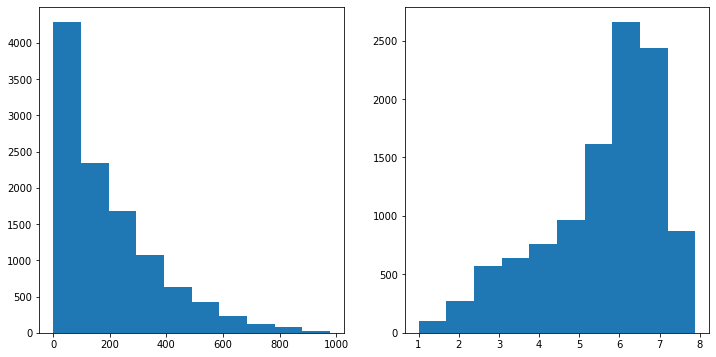

In [44]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.hist(y_target)
plt.subplot(1,2,2)
plt.hist(1+np.log(y_target))

### 위 4번의 내용을 반영하여 다시 학습 후 평가수행

In [45]:
# 타겟 컬럼인 count 값을 log1p 로 Log 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE : 1.075267073128036, RMSE : 176.8681231562364, MAE : 119.58789017846381


# 문제 5

### (1) RMSLE 오류는 줄었으나, RMSE는 늘어나서 피처를 인코딩하려고 할 때 쓰이는 방법과 효과는? 
### (2) year, month, hour, season, weather 칼럼을 인코딩하고 예측성능을 향상시키세요.

one-hot encoding을 통해 카테고리형 데이터를 one-hot 칼럼으로 변환시킴으로써 카테고리형 데이터를 모델이 순서가 있는 데이터로 오해하지 않도록 한다.

In [48]:
X_features_onehot = pd.get_dummies(X_features, columns = ["year","month","hour","season","weather"])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_features_onehot, y_target_log, test_size = 0.3, random_state = 0)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
        
    evaluate_regr(y_test , pred)
    
model = LinearRegression()

get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

RMSLE : 0.5976961488647843, RMSE : 97.94627258693815, MAE : 64.0311455743079
